# CH5.2 소규모 데이터셋에서 밑바닥부터 convnet 훈련하기

소규모 data를 사용해 img classification model을 만드는 일은 흔한 경우다

2000개의 train sample에서 ConvNet에 어떤 규제 방법도 사용하지 않고 train 할 경우 : **과대적합**으로 다소 낮은 71%의 acc를 달성

**overfitting**을 줄이기 위한 방법
1. data augmentation (이번 ch에서 다룸)
2. pretrained network 사용해 feature 추출
3. pretrained model tunning


## 1) 작은 dataset 문제에서 딥러니의 타당성

**deep learning의 근본적인 특징:**
1. **feature 공학의 수작업 없이 feature을 추출할 수 있다는 점** -> train sample이 많아야 함
    - sample의 수의 의미는 훈련하려는 network의 크기와 깊이에 상대적이다
    - model이 작고 규제가 잘 돼있으며 간단한 작업이라면, 수백개의 sample만으로도 풍분하다
    - **convnet은 지역적이고 평행이동으로 변하지 않는 feature을 학습하기 때문에 인식에 관한 문제에서 매우 효율적으로 data 사용**
        * 매우 작은 img dataset에서 어떤 종류의 feature 공학을 사용하지 않고도 convnet을 활용해 좋은 결과를 얻을 수 있다
        
        
2. **deep learning model은 매우 다목적이다**
    - 대규모 dataset에서 훈련시킨 img classification model을 조금만 변경시키면 완전히 다른 문제에도 사용 가능
    - 특히 computer vision에서는 ImageNet의 대규모 dataset에서 사전 훈련된 model을 공유하므로 매우 data가 적어도 강력한 vision model을 만들어낼 수 있다 

## 2) data 내려받기

data 구성 : 2000개의 img(1000개의 고양이, 1000개의 강아지)
- train data : 1000개( 500개 고양이, 500개 강아지)
- validation data : 500개(250개 고양이, 250개 강아지)
- test data : 500개(250개 고양이, 250개 강아지)    

In [1]:
import os, shutil

In [2]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './006975/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './006975/datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [4]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [5]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [6]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [7]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [8]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


## 3) network 구성하기

Conv2D(relu activation)+ MaxPooling2D layer을 번갈아 쌓음
* 복잡한 문제이기 때문에 network를 좀더 크게 만들 것임
* flatten layer의 크기가 너무 커지지 않도록 feature map의 크기를 줄일 수 있음
* binary classification 문제이므로 network는 하나의 unit(크기가 1인 dense 층)과 sigmoid activation으로 마무리
    - sigmoid unit은 한 class에 대한 확률을 encoding한다

> **NOTE**    
> feature map의 깊이는 network에서 점진적으로 증가하지만, feature map의 크기는 감소한다
>* 깊이: 32에서 128까지
>* 크기: 150x150에서 7x7까지

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

* 하나의 sigmoide unit으로 확률이 출력되므로 loss를 binary_crossentropy 사용

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 4) data 전처리

**data는 network에 주입되기 전에 부동소수 타입의 tensor로 전처리되어야 함**   
차례:
1. JPEG 사진 파일을 읽는다
2. JPEG를 RGB pixel 값으로 decoding한다
3. 그 다음 부동소수 타입(float)의 tensor로 변환
4. pixel 값의 scale을 (0, 255) 사이에서 [0,1] 사이로 조정 : normaliztion
    - 신경망은 작은 input값을 선호

>`keras.preprocessing.image`   
> 위 라이브러리에 img 처리를 위한 helper 도구들이 있다
> * 특히 `ImageDataGenerator` class는 img 파일을 전처리 배치 tensor로 자동으로 바꿔주는 **generator**를 만들어줌

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> `flow_from_directory()`   
> 서브 디렉터리의 순서대로 label을 할당한다
>- directory 아래 'cat'과 'dog'가 순서대로 0,1 label을 갖니다
>- classes 매개변수를 사용하면 directory label 할당 순서를 바꿀 수 있다
    + flow_from_directory(classes=['dogs','cats'])처럼 쓰면 cats가 target class로 1을 갖는다
>- class_mode 매개변수의 값은 다중분류일 때 `cateforical`또는 `sparse`이며, 이진 분류일 때 `binary`를 사용한다
    + categorical(defalts): one-hot encoding된 2차원 배열 반환
    + sparse: 정수 label을 담은 1차원 배열 반환
    + binary: 0또는 1로 채워진 1차원 배열 반환
    + 오토인코더처럼 입력을 target으로 할 경우 class_mode를 'input'으로 저장

#### NOTE

>**파이썬 generator**   
>iterator처럼 작동하는 객체, for ... in 연산자에 사용할 수 있다
>- yield 연산자 사용

In [13]:
def generator():
    i=0
    while True:
        i +=1
        yield i

In [14]:
for item in generator():
    print(item)
    if item>4:
        break

1
2
3
4
5


In [15]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


generator는 20개의 sample을 가지는 *batch*를 무한정으로 만들어낸다
- 따라서 target folder에 있는 이미지를 끝없이 반복한다
- 그러므로 `break`를 사용해야 한다

In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


C:\Users\bomsi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 29s 278ms/step - loss: 0.6932 - acc: 0.5100 - val_loss: 0.6686 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 28s 282ms/step - loss: 0.6675 - acc: 0.6072 - val_loss: 0.6448 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 30s 305ms/step - loss: 0.6182 - acc: 0.6493 - val_loss: 0.6187 - val_acc: 0.6420
Epoch 4/30
100/100 [==============================] - 29s 286ms/step - loss: 0.5740 - acc: 0.6901 - val_loss: 0.6075 - val_acc: 0.6540
Epoch 5/30
100/100 [==============================] - 28s 275ms/step - loss: 0.5386 - acc: 0.7222 - val_loss: 0.6524 - val_acc: 0.6510
Epoch 6/30
100/100 [==============================] - 27s 270ms/step - loss: 0.4960 - acc: 0.7646 - val_loss: 0.6550 - val_acc: 0.6450
Epoch 7/30
100/100 [==============================] - 27s 272ms/step - loss: 0.4912 - acc: 0.7572 - val_loss: 0.5702 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 27s 271ms/st

In [17]:
model.save('cats_and_dogs_small_1.h5')

>`fit_generator()`   
>fit method와 동일하되 data generator을 사용할 수 있다
>1. 첫번째 parameter로 input과 target을 무한정 반환하는 python generator을 매개변수로 받는다
>2. `steps_per_epoch`: data가 끝없이 생성되기 때문에 keras model에서 한 epoch당 batch 수를 정해주어야 한다 
    + steps_per_epoch 횟수만큼 grdient descent를 실행한 후 다음 epoch으로 넘어간다
    + 즉 20개가 하나의 batch이며 100개의 batch를 뽑으므로 20*100=2000개의 sample을 모드 처리한다
>3. `validation_data`: python generator or numpy배열의 튜플
    + python generator : validation data의 batch를 끊없이 반환
        - 따라서 얼마나 많은 validation data의 batch를 추출할지 `validation_steps`으로 지정해야함

In [18]:
import matplotlib.pyplot as plt

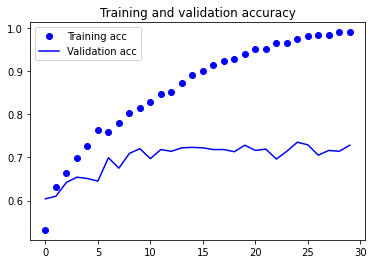

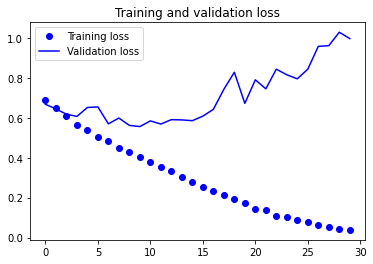

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- train acc는 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달, 반면 validation acc는 70-72%에서 멈춤
- validation loss는 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않음 반면 train loss는 거의 0에 도달할 때까지 선형적으로 계속 감소

비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제   
- pre: 드롭아웃이나 가중치 감소(L2 규제)와 같은 과대적합을 감소시킬 수 있는 여러 가지 기법 사용
- 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 **데이터 증식(Data Argument)**을 시도해 보겠습니다.

## 5) Data Argument

과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생한다   


**Data Argument**는 기존의 train sample로부터 더 많은 train data를 생성하는 방법이다
- 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것이라는 기대에서 발생한 아이디어
- 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘린다
- 훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표 -> 모델이 데이터의 여러 측면을 학습하면 일반화에 도움 됨


*케라스에서는 `ImageDataGenerator`가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있다:*

In [21]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

> `ImageDataGenerator`   
>* `rotation_range`: 랜덤하게 사진을 회전시킬 각도 범위(0-180 사이).
>* `width_shift_range`, `height_shift_range`: 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위(전체 넓이와 높이에 대한 비율).
>* `shear_range`: 랜덤하게 전단 변환을 적용할 각도 범위
>* `zoom_range`: 랜덤하게 사진을 확대할 범위
>* `horizontal_flip`: 랜덤하게 이미지를 수평으로 뒤집는다. 
    + 수평 대칭을 가정할 수 있을 때 사용
    + ex) 풍경/인물 사진
>* `fill_mode`: 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


증식된 이미지 샘플을 살펴보죠:

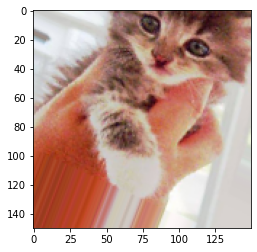

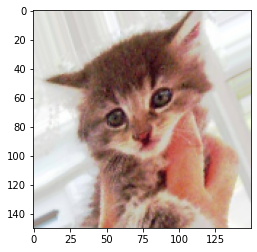

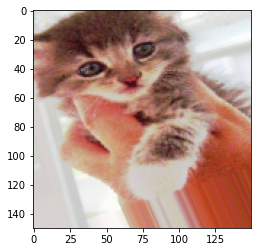

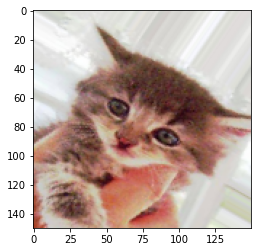

In [22]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

model train 시, model에 같은 data가 두번 주입되지 않으나,     
**적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 크다**
* 즉, 새로운 정보를 만들어낼 수 없고 단지 기존 정보의 재조합만 가능
* 그렇기 때문에 완전히 과대적합을 제거하기에 충분하지 않을 수 있다

과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 `Dropout` 층을 추가하겠습니다:

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 28s 278ms/step - loss: 0.6647 - acc: 0.6030 - val_loss: 0.6374 - val_acc: 0.6290


In [28]:
model.save('cats_and_dogs_small_2.h5')

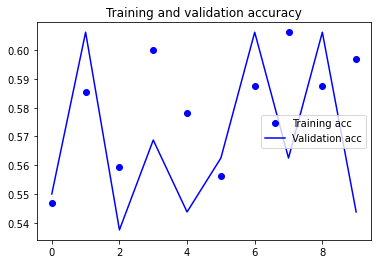

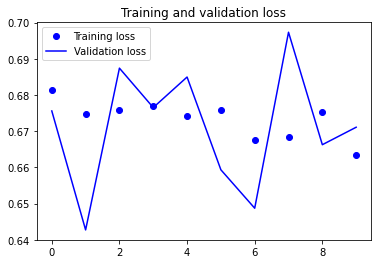

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

validation data의 acc가 82% 달성, 이전과 비교해봤을 15% 향상